### EDA

### Détection de fraude – Analyse exploratoire et modélisation

L’objectif de ce projet est de détecter des transactions frauduleuses à partir de données transactionnelles.
Le projet suit les étapes classiques d’un pipeline de data science :
- Analyse exploratoire des données
- Feature engineering
- Modélisation
- Interprétabilité du modèle



In [11]:
!pip install seaborn 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv("transactions.csv")
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [14]:
print("Shape :", df.shape)
df.info()

Shape : (299695, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-nu

In [15]:
df.describe(include='all')

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
count,299695.0000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695,299695,299695,299695,299695.000000,299695.000000,299695.000000,299695.000000,299695,299695.000000,299695.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,10,10,2,5,NaN,NaN,NaN,NaN,297975,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,US,US,web,electronics,NaN,NaN,NaN,NaN,2024-08-03T03:21:43Z,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,32430,32295,152226,60220,NaN,NaN,NaN,NaN,3,NaN,NaN
mean,149848.0000,3002.559432,973.397871,50.673321,148.142973,177.165279,NaN,NaN,NaN,NaN,0.153640,0.837999,0.872110,0.784588,NaN,357.049028,0.022062
std,86514.6388,1732.309663,525.241409,5.976391,200.364624,306.926507,NaN,NaN,NaN,NaN,0.360603,0.368453,0.333968,0.411109,NaN,427.672074,0.146887
min,1.0000,1.000000,1.000000,40.000000,3.520000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,74924.5000,1501.000000,516.000000,46.000000,46.190000,42.100000,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,NaN,136.600000,0.000000
50%,149848.0000,3007.000000,975.000000,51.000000,90.130000,89.990000,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,NaN,273.020000,0.000000
75%,224771.5000,4504.000000,1425.000000,56.000000,173.450000,191.110000,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,NaN,409.180000,0.000000


#### Interprétation : 
Les statistiques descriptives confirment la présence de distributions asymétriques et de valeurs extrêmes sur certaines variables numériques.

In [16]:
df.isnull().sum()

transaction_id             0
user_id                    0
account_age_days           0
total_transactions_user    0
avg_amount_user            0
amount                     0
country                    0
bin_country                0
channel                    0
merchant_category          0
promo_used                 0
avs_match                  0
cvv_result                 0
three_ds_flag              0
transaction_time           0
shipping_distance_km       0
is_fraud                   0
dtype: int64

#### Interprétation
Aucune valeur manquante détectée → dataset propre

#### Analyse de la variable cible - Taux de fraude

#### Graphique Camembert fraude / non fraude


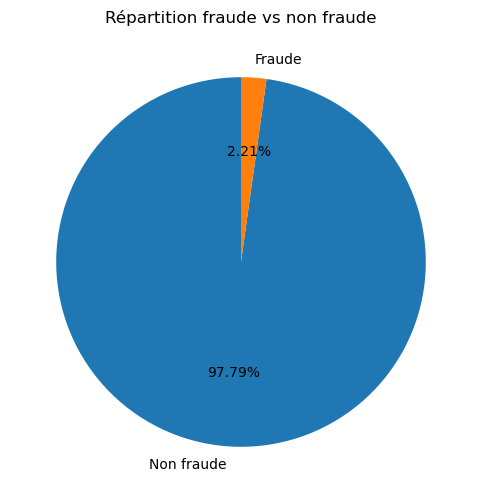

Taux de fraude : 2.2062%


In [17]:
# Taux de fraude
fraud_rate = df["is_fraud"].mean()
non_fraud_rate = 1 - fraud_rate

labels = ["Non fraude", "Fraude"]
sizes = [non_fraud_rate, fraud_rate]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=90)
plt.title("Répartition fraude vs non fraude")
plt.show()

print(f"Taux de fraude : {fraud_rate:.4%}")

#### Interprétation
- Le dataset est **déséquilibré** (faible proportion de fraude).  
- Ce déséquilibre devra être traité dans le modèle (class_weight).

### Analyse des variables numériques
L’objectif est de comparer les distributions des variables numériques entre les transactions frauduleuses et les transactions légitimes.


In [18]:
num_cols = ["amount", "shipping_distance_km", "account_age_days",
            "total_transactions_user", "avg_amount_user"]

# Vérification rapide que les colonnes existent
missing = [c for c in num_cols if c not in df.columns]
if missing:
    print("Colonnes manquantes dans le dataset :", missing)
else:
    print("Variables numériques :", num_cols)

Variables numériques : ['amount', 'shipping_distance_km', 'account_age_days', 'total_transactions_user', 'avg_amount_user']


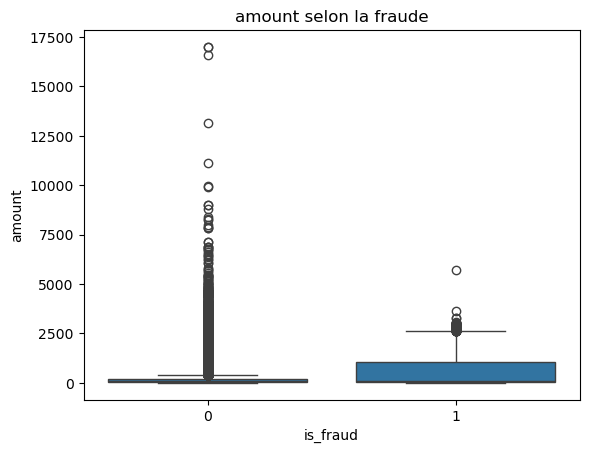

In [34]:
sns.boxplot(x="is_fraud", y="amount", data=df)
plt.title("amount selon la fraude")
plt.xlabel("is_fraud")
plt.ylabel("amount")
plt.show()

#### Interprétation
- Les transactions frauduleuses présentent des montants généralement plus élevés et plus dispersés que les transactions légitimes.  
- La présence de valeurs extrêmes suggère l’intérêt d’une transformation (par exemple logarithmique) afin de stabiliser la distribution et potentiellement améliorer les performances du modèle.

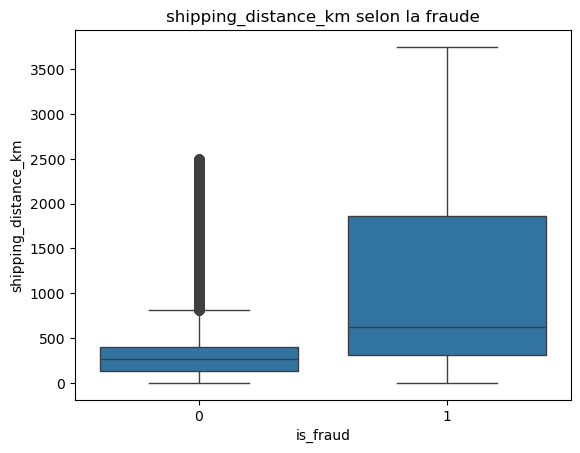

In [35]:
sns.boxplot(x="is_fraud", y="shipping_distance_km", data=df)
plt.title("shipping_distance_km selon la fraude")
plt.xlabel("is_fraud")
plt.ylabel("shipping_distance_km")
plt.show()

#### Interprétation :
- Les transactions frauduleuses sont associées à des distances de livraison plus importantes en moyenne.  
- Cette variable semble capter des comportements atypiques, ce qui en fait un bon candidat pour la détection de fraude.

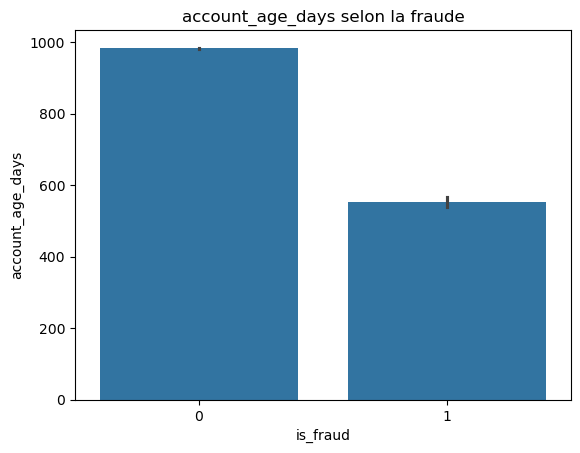

In [21]:
sns.barplot(x="is_fraud", y="account_age_days", data=df)
plt.title("account_age_days selon la fraude")
plt.xlabel("is_fraud")
plt.ylabel("account_age_days")
plt.show()

#### Interprétation :
- Les comptes impliqués dans des transactions frauduleuses ont tendance à être plus récents.  
- L’ancienneté du compte apparaît donc comme un indicateur pertinent du risque de fraude.

#### Variables catégorielles — taux de fraude par modalité

On calcule le **taux de fraude** par catégorie afin d’identifier les modalités associées à un risque plus élevé.

In [22]:
cat_cols = ["avs_match", "cvv_result", "three_ds_flag"]

missing_cat = [c for c in cat_cols if c not in df.columns]
if missing_cat:
    print("Colonnes catégorielles manquantes :", missing_cat)
else:
    print("Variables catégorielles :", cat_cols)

Variables catégorielles : ['avs_match', 'cvv_result', 'three_ds_flag']


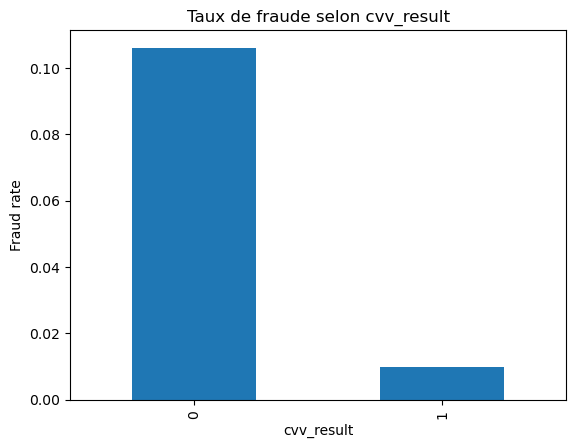

In [23]:
rate = df.groupby("cvv_result")["is_fraud"].mean().sort_values(ascending=False)
rate.plot(kind="bar")
plt.title("Taux de fraude selon cvv_result")
plt.ylabel("Fraud rate")
plt.show()

#### Interprétation :
- Certaines modalités du résultat CVV sont associées à un taux de fraude significativement plus élevé.  
- Cette variable présente donc un fort potentiel prédictif pour la détection de fraude.

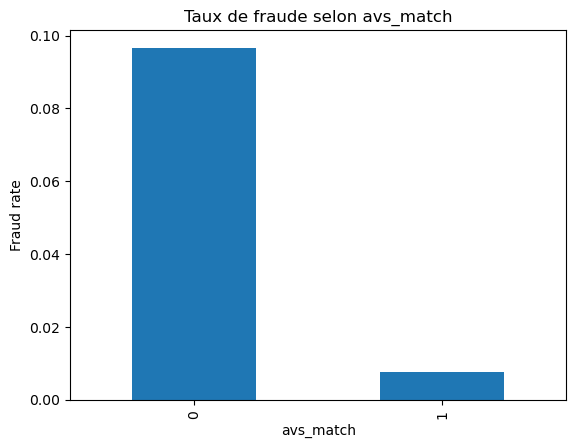

In [24]:
rate = df.groupby("avs_match")["is_fraud"].mean().sort_values(ascending=False)
rate.plot(kind="bar")
plt.title("Taux de fraude selon avs_match")
plt.ylabel("Fraud rate")
plt.show()

#### Interprétation :
- Les transactions pour lesquelles la vérification d’adresse échoue présentent un taux de fraude supérieur.  
- Ce résultat est cohérent avec les mécanismes de fraude connus et confirme l’intérêt de cette variable.fraude.

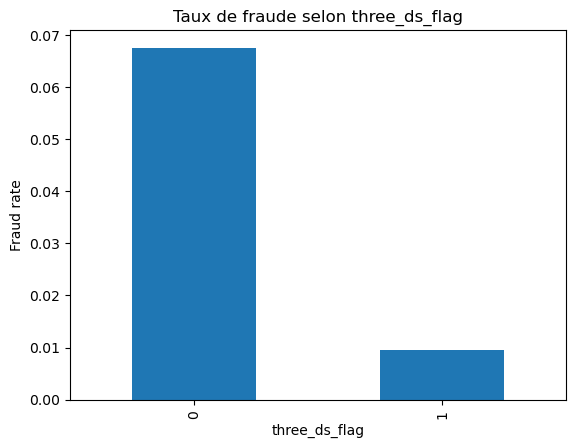

In [25]:
rate = df.groupby("three_ds_flag")["is_fraud"].mean().sort_values(ascending=False)
rate.plot(kind="bar")
plt.title("Taux de fraude selon three_ds_flag")
plt.ylabel("Fraud rate")
plt.show()

#### Interprétation :
- L’absence de validation 3D Secure est associée à un taux de fraude plus élevé.  
- Ce graphique met en évidence l’intérêt de l’authentification forte dans la réduction du risque de fraude.

### Corrélation entre variables numériques

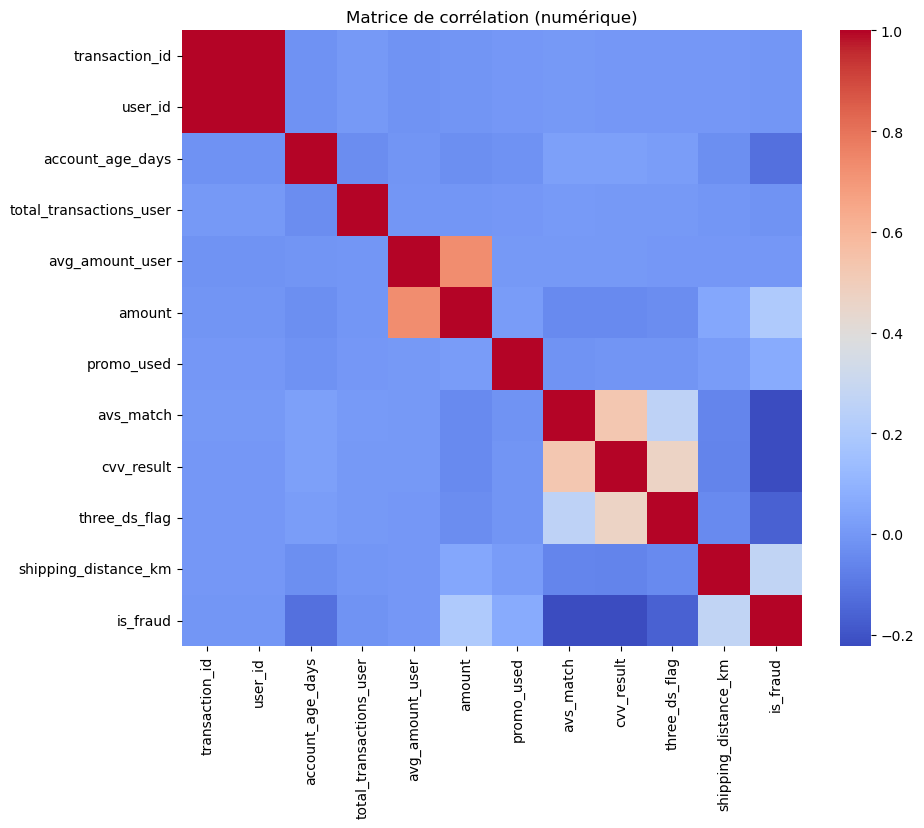

In [26]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Matrice de corrélation (numérique)")
plt.show()

#### Interprétation
- La matrice de corrélation montre peu de relations linéaires fortes entre les variables numériques et la variable cible.  
- Cela suggère que des **modèles non linéaires** (arbres, boosting) ou des combinaisons de variables seront plus adaptés pour capter les mécanismes de fraude.


### Conclusion : 
L’analyse exploratoire met en évidence :  
 - un fort déséquilibre entre transactions frauduleuses et non frauduleuses,  
 - des différences de comportement sur plusieurs variables numériques,  
 - des variables catégorielles fortement liées au risque de fraude.  

Ces observations justifient la mise en place d’un **feature engineering ciblé** ainsi que l’utilisation de **modèles adaptés aux données déséquilibrées**, qui feront l’objet des sections suivantes (baseline ML, rééquilibrage, modèles avancés, interprétabilité).


### Analyse exploratoire ciblée sur les transactions frauduleuses

Cette section propose un zoom exploratoire uniquement sur les transactions frauduleuses (≈ 2,2 % du dataset),
afin de mieux comprendre leurs caractéristiques et d’identifier des pistes supplémentaires de feature engineering.


In [27]:
df_fraud = df[df["is_fraud"] == 1].copy()

print("Nombre de transactions frauduleuses :", df_fraud.shape[0])
print("Pourcentage de fraude :", df_fraud.shape[0] / df.shape[0] * 100)

Nombre de transactions frauduleuses : 6612
Pourcentage de fraude : 2.206243013730626


#### Interpétation : 
Les transactions frauduleuses représentent environ 2,21 % du dataset.

Ce sous-ensemble est isolé afin d’analyser plus finement les comportements propres aux fraudes,
sans comparaison directe avec les transactions légitimes.


#### Distribution des montants FRAUDE ONLY

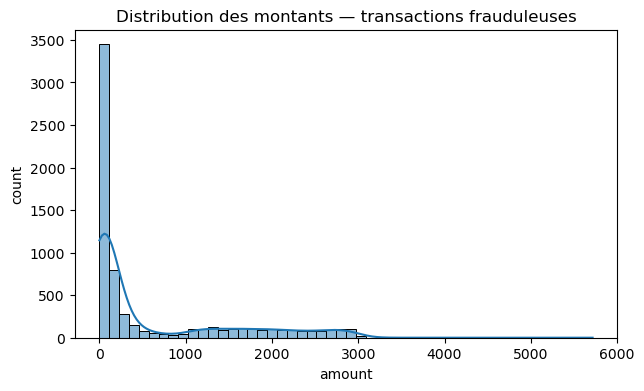

In [28]:
plt.figure(figsize=(7,4))
sns.histplot(df_fraud["amount"], bins=50, kde=True)
plt.title("Distribution des montants — transactions frauduleuses")
plt.xlabel("amount")
plt.ylabel("count")
plt.show()

#### Interpétation : 
Les montants des transactions frauduleuses présentent une distribution asymétrique,
avec une concentration sur des montants élevés et la présence de valeurs extrêmes.

Cela confirme l’intérêt d’une transformation du type logarithmique pour cette variable.

### Distance de livraison chez les fraudeurs

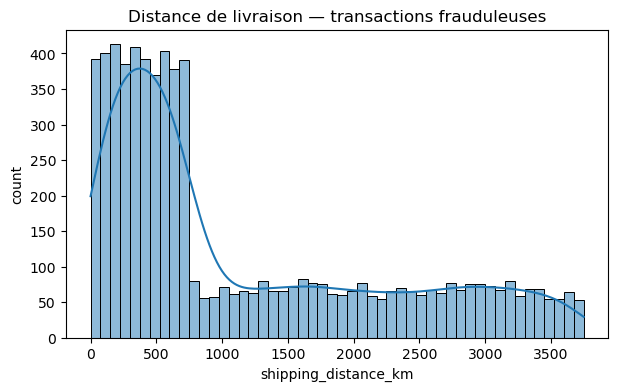

In [29]:
plt.figure(figsize=(7,4))
sns.histplot(df_fraud["shipping_distance_km"], bins=50, kde=True)
plt.title("Distance de livraison — transactions frauduleuses")
plt.xlabel("shipping_distance_km")
plt.ylabel("count")
plt.show()

#### Interpétation : 
Les transactions frauduleuses sont fréquemment associées à des distances de livraison importantes,
ce qui suggère des comportements d’achat atypiques ou à risque.

Cette variable apparaît particulièrement informative pour la détection de fraude.

### Ancienneté des comptes frauduleux

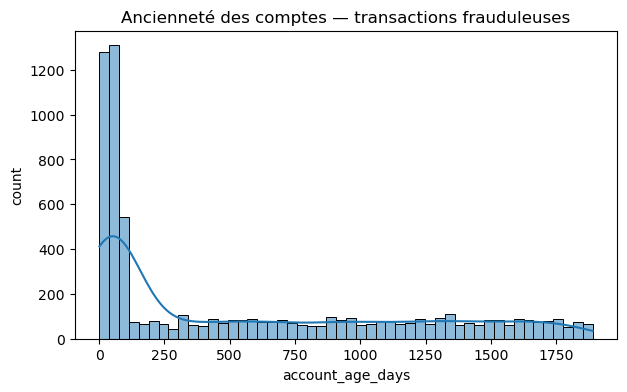

In [30]:
plt.figure(figsize=(7,4))
sns.histplot(df_fraud["account_age_days"], bins=50, kde=True)
plt.title("Ancienneté des comptes — transactions frauduleuses")
plt.xlabel("account_age_days")
plt.ylabel("count")
plt.show()

#### Interprétation : 
Une part importante des transactions frauduleuses provient de comptes récents.

Ce comportement est cohérent avec des stratégies de fraude reposant sur la création rapide de nouveaux comptes.

### Analyse catégorielle FRAUDE ONLY

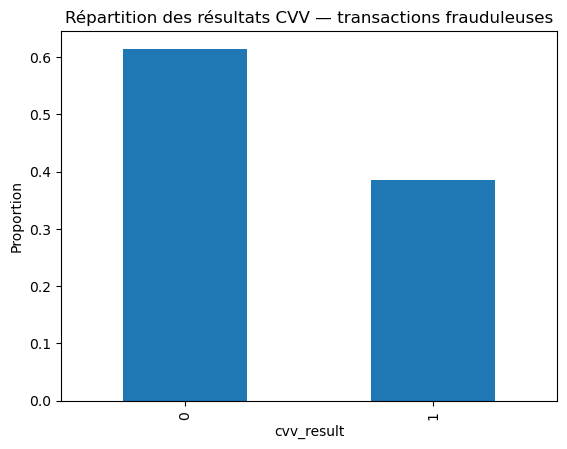

In [31]:
df_fraud["cvv_result"].value_counts(normalize=True).plot(kind="bar")
plt.title("Répartition des résultats CVV — transactions frauduleuses")
plt.ylabel("Proportion")
plt.show()

#### Interprétation : 
Certaines modalités du résultat CVV sont surreprésentées parmi les transactions frauduleuses,
ce qui confirme leur rôle central dans la détection de comportements frauduleux.

#### AVS chez les fraudeurs

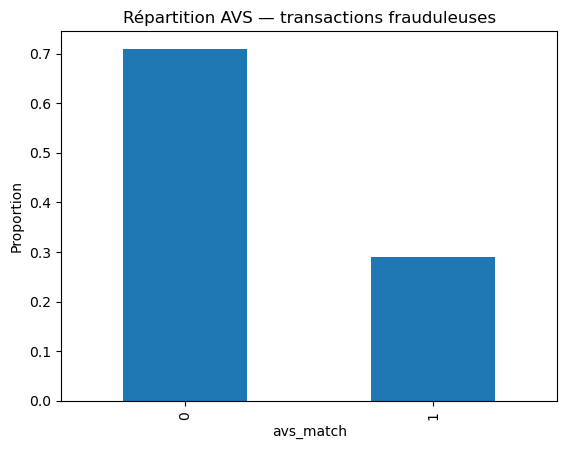

In [32]:
df_fraud["avs_match"].value_counts(normalize=True).plot(kind="bar")
plt.title("Répartition AVS — transactions frauduleuses")
plt.ylabel("Proportion")
plt.show()

#### Interprétation : 
Les échecs de vérification d’adresse sont largement présents dans les transactions frauduleuses,
ce qui renforce la pertinence de cette variable comme indicateur de risque.


#### 3DS chez les fraudeurs

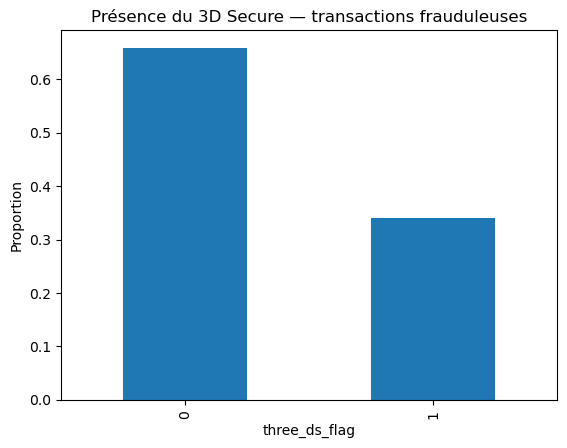

In [33]:
df_fraud["three_ds_flag"].value_counts(normalize=True).plot(kind="bar")
plt.title("Présence du 3D Secure — transactions frauduleuses")
plt.ylabel("Proportion")
plt.show()

#### Interprétation : 
Une majorité de transactions frauduleuses ne bénéficie pas d’une authentification forte,
ce qui met en évidence l’importance du 3D Secure dans la prévention de la fraude.


### Conclusion de l’EDA ciblé fraude
L’analyse ciblée des transactions frauduleuses met en évidence :
- des montants souvent élevés et asymétriques,
- des distances de livraison importantes,
- des comptes fréquemment récents,
- une surreprésentation de certaines modalités CVV, AVS et de l’absence de 3D Secure.

Ces éléments confirment les résultats de l’EDA global et motivent la création de variables dérivées
(combinaisons, transformations, indicateurs de risque) lors de la phase de feature engineering.